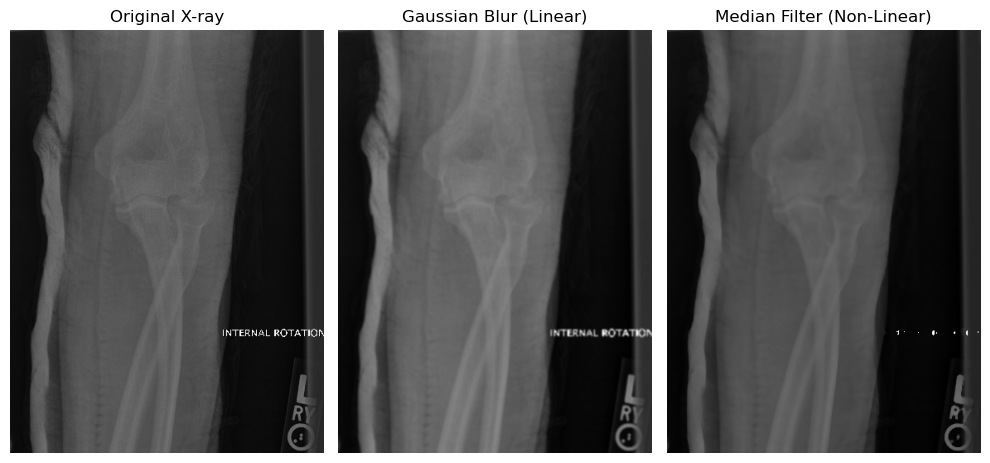

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the X-ray image
image_path = "C:/Users/User/Downloads/image1_2.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found!")
    exit()

# Apply Gaussian Blur (Linear Filtering)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 1)

# Apply Median Filter (Non-Linear Filtering)
median_filter = cv2.medianBlur(image, 5)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original X-ray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blur (Linear)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(median_filter, cmap='gray')
plt.title("Median Filter (Non-Linear)")
plt.axis("off")

plt.tight_layout()
plt.show()


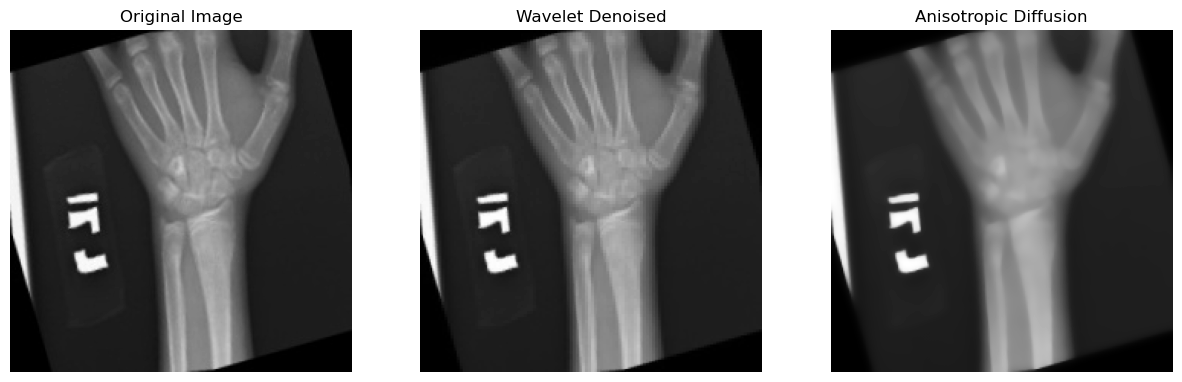

In [26]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle

# Load the X-ray image in grayscale
image = cv2.imread("C:/Users/User/Downloads/image11.jpg", cv2.IMREAD_GRAYSCALE)

### 1. Wavelet Denoising ###
def wavelet_denoise(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    coeffs[1:] = [(pywt.threshold(cH, np.std(cH), mode='soft'),
                   pywt.threshold(cV, np.std(cV), mode='soft'),
                   pywt.threshold(cD, np.std(cD), mode='soft'))
                  for cH, cV, cD in coeffs[1:]]
    return pywt.waverec2(coeffs, wavelet)

denoised_wavelet = wavelet_denoise(image)

### 2. Anisotropic Diffusion ###
def anisotropic_diffusion(image, weight=0.1, num_iter=15):
    return denoise_tv_chambolle(image, weight=weight, channel_axis=None, max_num_iter=num_iter)

denoised_anisotropic = anisotropic_diffusion(image)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(denoised_wavelet, cmap='gray')
axs[1].set_title("Wavelet Denoised")
axs[1].axis("off")

axs[2].imshow(denoised_anisotropic, cmap='gray')
axs[2].set_title("Anisotropic Diffusion")
axs[2].axis("off")

plt.show()


C:\Users\User\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
C:\Users\User\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:1659: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
C:\Users\User\AppData\Local\Temp\ipykernel_4720\3591847196.py:16: RuntimeWarning: invalid value encountered in cast
  wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))  # Convert to uint8


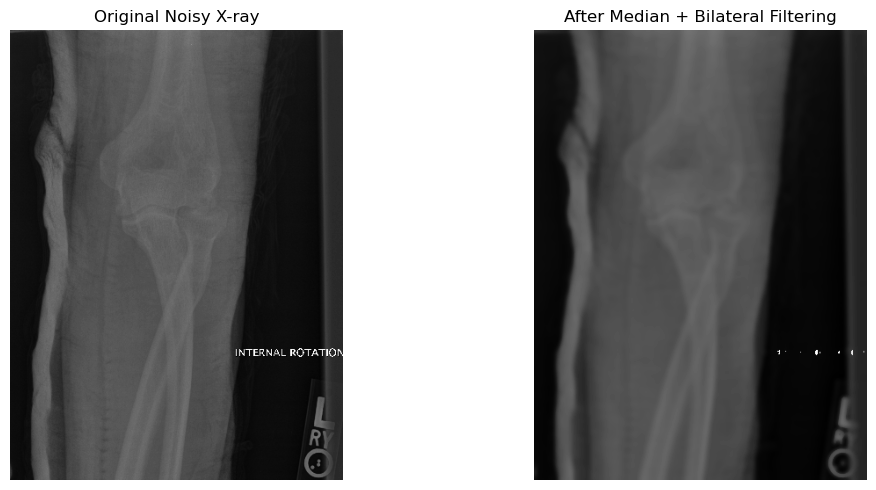

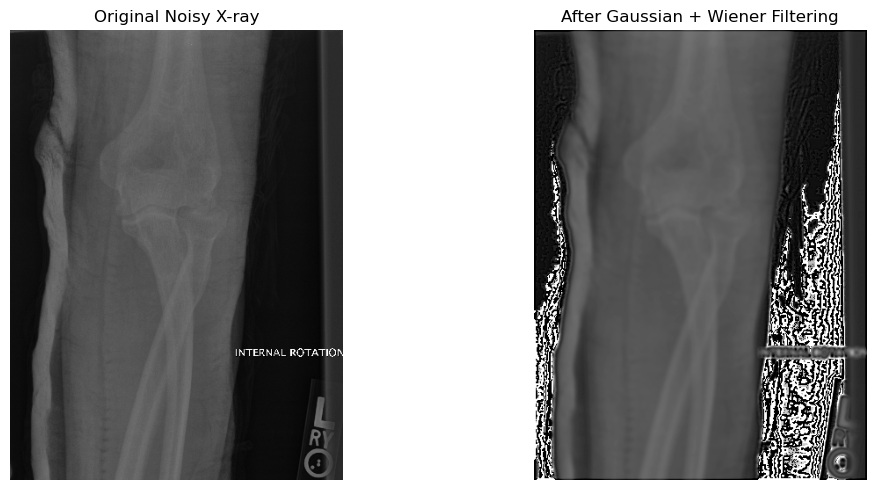

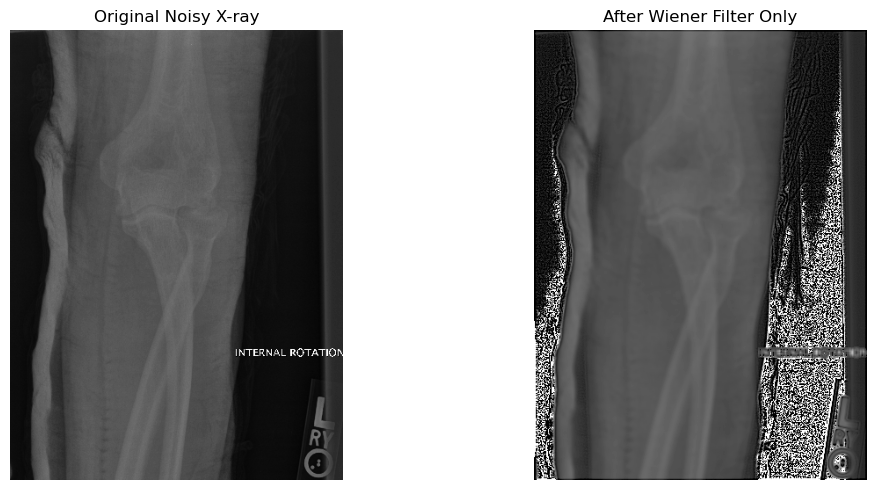

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Load X-ray Image (Convert to Grayscale)
image = cv2.imread("C:/Users/User/Downloads/image1_2.png", cv2.IMREAD_GRAYSCALE)

### 1️⃣ Median Filter + Bilateral Filter ###
median_filtered = cv2.medianBlur(image, 5)
bilateral_filtered = cv2.bilateralFilter(median_filtered, 9, 75, 75)

### 2️⃣ Gaussian Blur + Wiener Filter ###
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
wiener_filtered = wiener(gaussian_blur, (5, 5))
wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))  # Convert to uint8

### 3️⃣ Wiener Filter Only ###
wiener_only = wiener(image, (5, 5))
wiener_only = np.uint8(np.clip(wiener_only, 0, 255))

# Function to plot before and after comparison
def plot_comparison(before, after, title_before, title_after):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].imshow(before, cmap="gray")
    axes[0].set_title(title_before)
    axes[0].axis("off")
    
    axes[1].imshow(after, cmap="gray")
    axes[1].set_title(title_after)
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()

# 1️⃣ Comparison: Median + Bilateral Filtering
plot_comparison(image, bilateral_filtered, "Original Noisy X-ray", "After Median + Bilateral Filtering")

# 2️⃣ Comparison: Gaussian + Wiener Filtering
plot_comparison(image, wiener_filtered, "Original Noisy X-ray", "After Gaussian + Wiener Filtering")

# 3️⃣ Comparison: Wiener Filter Only
plot_comparison(image, wiener_only, "Original Noisy X-ray", "After Wiener Filter Only")


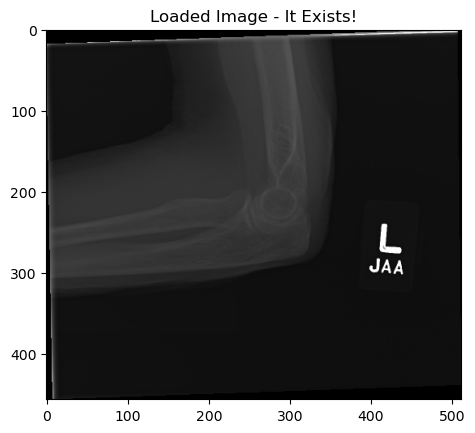

In [5]:
# Checking the Image Path
import cv2
import matplotlib.pyplot as plt

image_path = "C:/Users/User/Downloads/image1.png"

image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found! Check the path and try again.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image - It Exists!")
    plt.show()

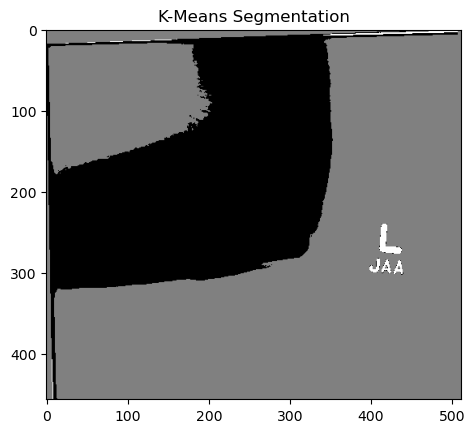

In [21]:
# Debugging K-Means Clustering

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image_path = "C:/Users/User/Downloads/image1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image to 1D for K-Means
img_reshaped = image.reshape((-1, 1))

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(img_reshaped)

segmented = kmeans.labels_.reshape(image.shape)

plt.imshow(segmented, cmap='gray')
plt.title("K-Means Segmentation")
plt.show()



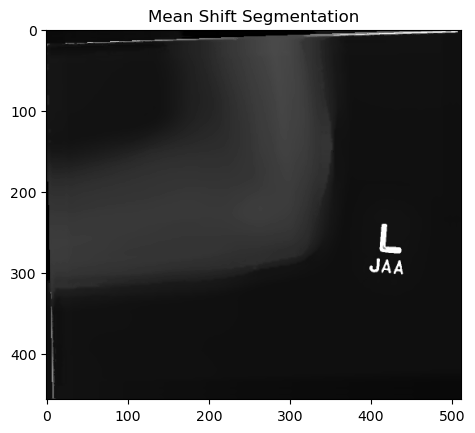

In [19]:
#Debugging Mean Shift

import cv2
import matplotlib.pyplot as plt

image_path = "C:/Users/User/Downloads/image1.png"
image = cv2.imread(image_path)

mean_shift = cv2.pyrMeanShiftFiltering(image, 20, 40)
gray_result = cv2.cvtColor(mean_shift, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_result, cmap='gray')
plt.title("Mean Shift Segmentation")
plt.show()


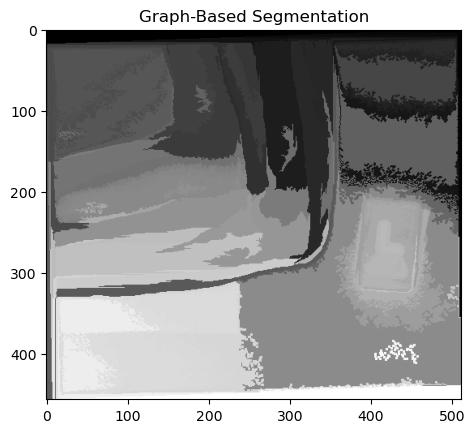

In [17]:
# Graph-Based Segmentation
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb

image_path = "C:/Users/User/Downloads/image1.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

segments = felzenszwalb(image_rgb, scale=100, sigma=0.5, min_size=100)

plt.imshow(segments, cmap='gray')
plt.title("Graph-Based Segmentation")
plt.show()

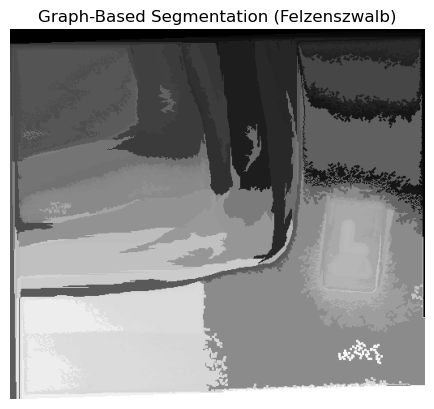

In [25]:
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb
from skimage.color import rgb2gray

# Load the X-ray image
image_path = "C:/Users/User/Downloads/image1.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Apply Felzenszwalb segmentation
segments = felzenszwalb(image_rgb, scale=100, sigma=0.5, min_size=100)

# Display results
plt.imshow(segments, cmap='gray')
plt.title("Graph-Based Segmentation (Felzenszwalb)")
plt.axis("off")
plt.show()

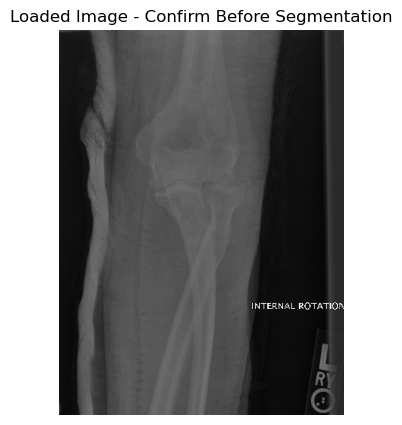

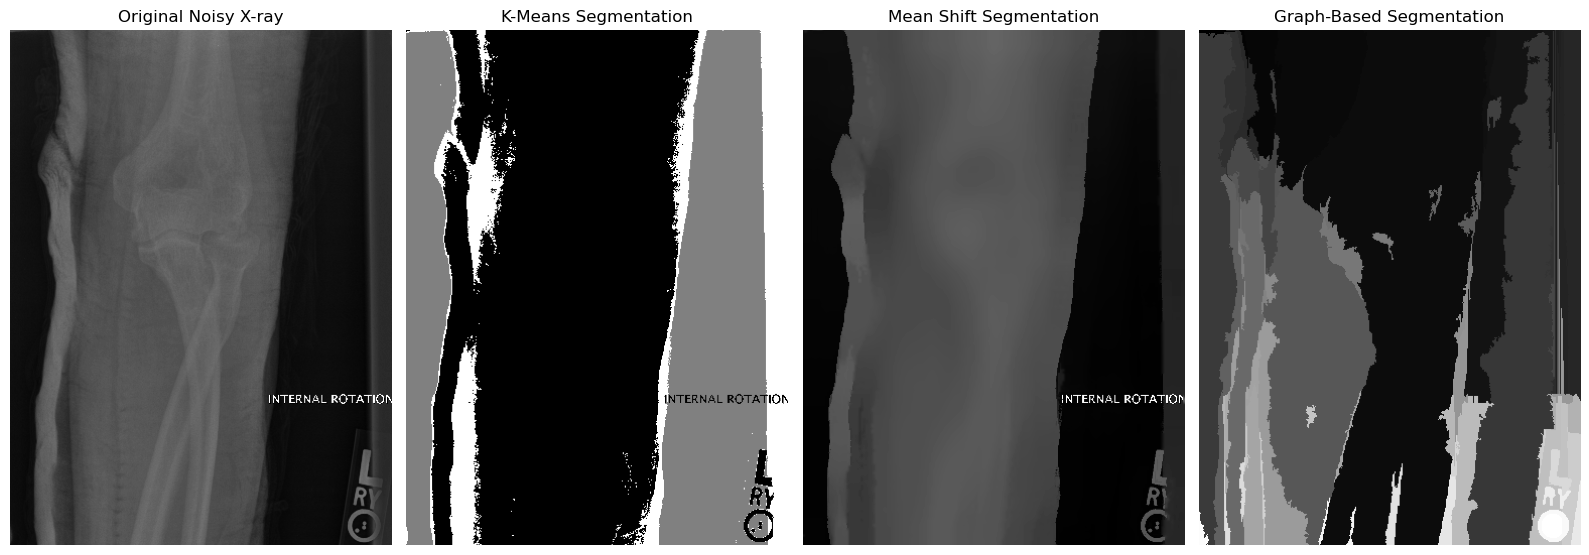

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.segmentation import felzenszwalb
from skimage.color import rgb2gray

# Load the noisy X-ray image
image_path = "C:/Users/User/Downloads/image1_2.png"  # Update with actual path
image = cv2.imread(image_path)

# ✅ Step 1: Check if image is loaded
if image is None:
    print("Error: Image not found! Check the path and try again.")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ✅ Step 2: Display the original image before segmentation
plt.figure(figsize=(5,5))
plt.imshow(gray, cmap='gray')
plt.title("Loaded Image - Confirm Before Segmentation")
plt.axis("off")
plt.show()

### 1️⃣ K-Means Clustering ###
def kmeans_segmentation(image, k=3):
    img_reshaped = image.reshape((-1, 1))  # Flatten image to 1D
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(img_reshaped)
    segmented = kmeans.labels_.reshape(image.shape)  # Reshape back to 2D
    return segmented

kmeans_result = kmeans_segmentation(gray, k=3)

### 2️⃣ Mean Shift Segmentation ###
def mean_shift_segmentation(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Reduce noise
    mean_shift = cv2.pyrMeanShiftFiltering(image, 20, 40)  # Mean Shift filtering
    return cv2.cvtColor(mean_shift, cv2.COLOR_BGR2GRAY)

mean_shift_result = mean_shift_segmentation(image)

### 3️⃣ Graph-Based Segmentation (Felzenszwalb Algorithm) ###
def graph_based_segmentation(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    segments = felzenszwalb(image_rgb, scale=100, sigma=0.5, min_size=100)  # Apply segmentation
    return segments

graph_result = graph_based_segmentation(image)

### ✅ Step 3: Display Results ###
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
titles = ["Original Noisy X-ray", "K-Means Segmentation", "Mean Shift Segmentation", "Graph-Based Segmentation"]
results = [gray, kmeans_result, mean_shift_result, graph_result]

for i in range(4):
    axes[i].imshow(results[i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()


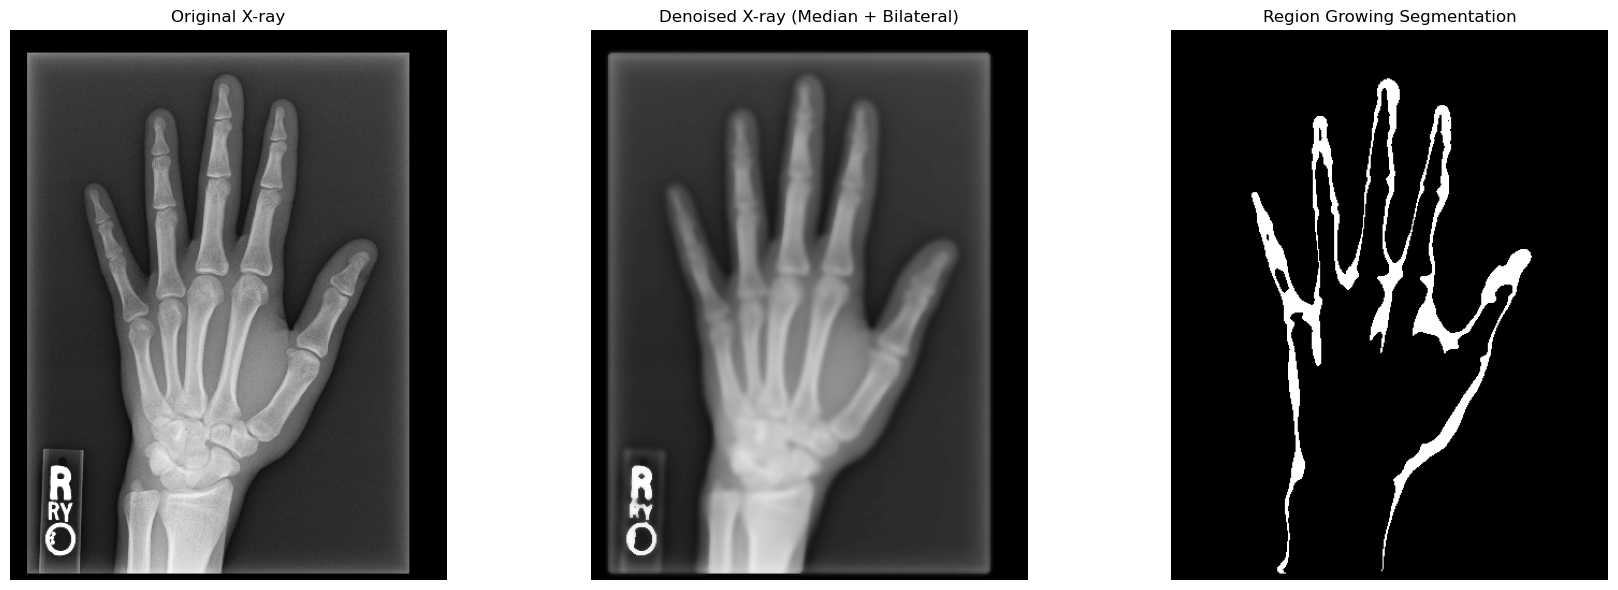

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from skimage.segmentation import flood, flood_fill

# Load X-ray Image (Convert to Grayscale)
image = cv2.imread("C:/Users/User/Downloads\image1_test.png", cv2.IMREAD_GRAYSCALE)

### 1️⃣ Apply Noise Reduction ###
median_filtered = cv2.medianBlur(image, 5)
bilateral_filtered = cv2.bilateralFilter(median_filtered, 9, 75, 75)  # Best filtering combo

### 2️⃣ Implement Region Growing Algorithm ###
def region_growing(img, seed_point, threshold=10):
    """ Perform region growing based on intensity similarity. """
    mask = np.zeros_like(img, dtype=np.uint8)  # Empty mask
    seed_value = img[seed_point]  # Intensity of seed point
    
    # Use flood-fill algorithm
    segmented = flood(img, seed_point, tolerance=threshold)
    
    # Convert boolean mask to uint8 format
    mask[segmented] = 255
    return mask

# Define a seed point manually (adjust for different X-ray images)
seed_point = (150, 150)  # Change based on the location of the bone region

# Apply Region Growing
region_grown = region_growing(bilateral_filtered, seed_point, threshold=15)

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original X-ray")
axes[0].axis("off")

axes[1].imshow(bilateral_filtered, cmap="gray")
axes[1].set_title("Denoised X-ray (Median + Bilateral)")
axes[1].axis("off")

axes[2].imshow(region_grown, cmap="gray")
axes[2].set_title("Region Growing Segmentation")
axes[2].axis("off")

plt.tight_layout()
plt.show()


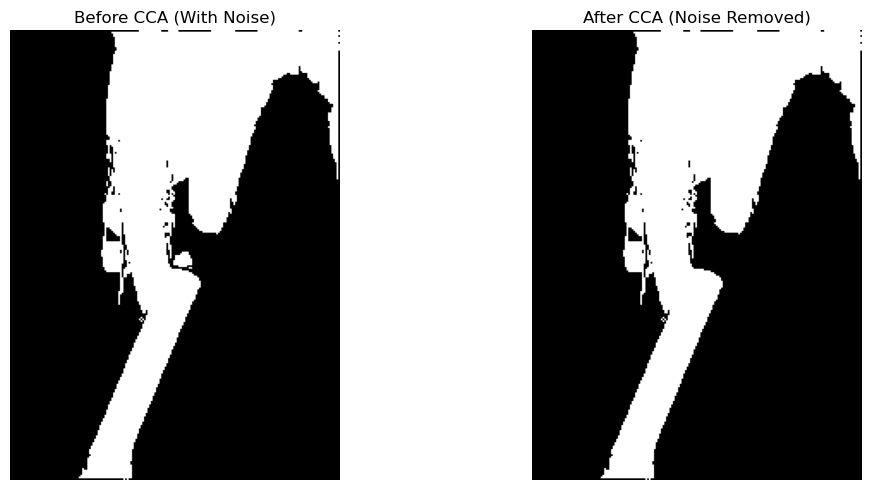

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Load the image properly
image_path = r"C:\Users\User\Downloads\image4.jpg"  # Use raw string format
binary_mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if binary_mask is None:
    print("Error: Image not loaded. Check the file path.")
    exit()

# Convert to binary (ensure proper thresholding)
_, binary_mask = cv2.threshold(binary_mask, 127, 255, cv2.THRESH_BINARY)

### 1️⃣ Connected Component Analysis (CCA) for Noise Removal ###
def remove_small_objects(binary_mask, min_size=500):
    """ Removes small noisy regions using Connected Component Analysis (CCA). """
    labeled_mask = label(binary_mask)  # Label connected components
    new_mask = np.zeros_like(binary_mask)

    for region in regionprops(labeled_mask):
        if region.area >= min_size:  # Keep only large regions
            new_mask[labeled_mask == region.label] = 255

    return new_mask

# Apply CCA to remove small noisy regions
filtered_mask = remove_small_objects(binary_mask, min_size=500)

# Display Before & After CCA
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(binary_mask, cmap="gray")
axes[0].set_title("Before CCA (With Noise)")
axes[0].axis("off")

axes[1].imshow(filtered_mask, cmap="gray")
axes[1].set_title("After CCA (Noise Removed)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


IoU Score: 0.9332
Dice Coefficient: 0.9654
Pixel Accuracy: 0.9818


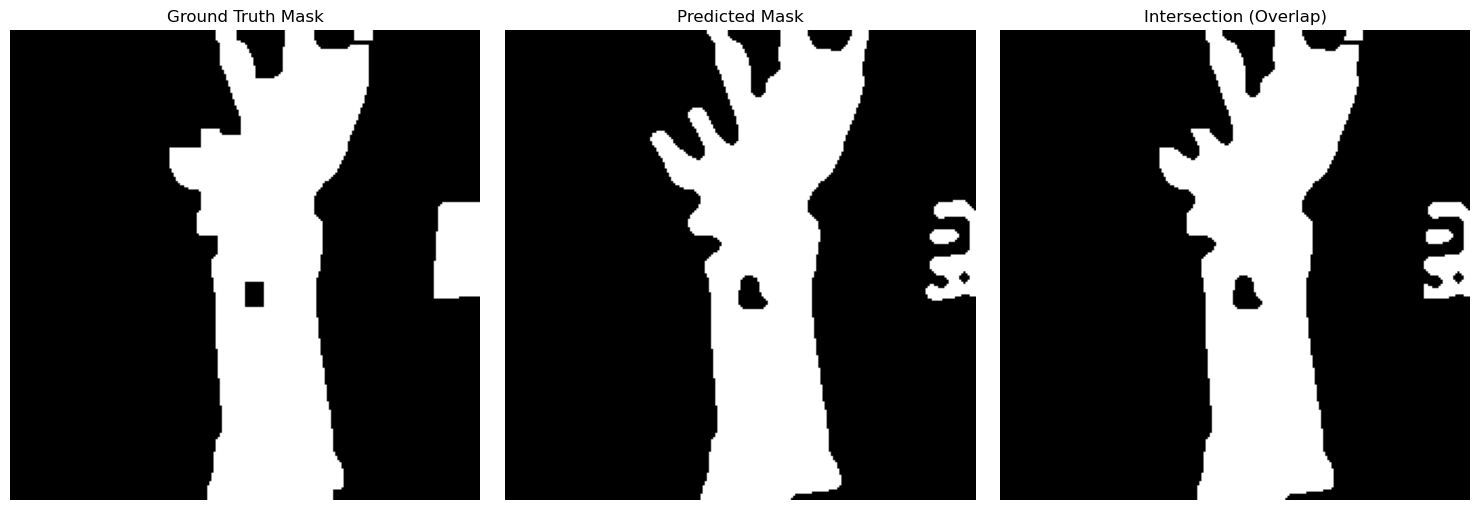

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score, accuracy_score

# Load the predicted segmentation mask
predicted_mask = cv2.imread("C:/Users/User/Downloads/refined_segmented_mask.jpg", cv2.IMREAD_GRAYSCALE)

# Load the ground truth mask
ground_truth_mask = cv2.imread("C:/Users/User/Downloads/final_ground_truth_mask.jpg", cv2.IMREAD_GRAYSCALE)

# Check if images are loaded properly
if predicted_mask is None or ground_truth_mask is None:
    print("Error: One or both images not loaded. Check file paths.")
    exit()

# Convert to binary format
_, predicted_mask = cv2.threshold(predicted_mask, 127, 1, cv2.THRESH_BINARY)
_, ground_truth_mask = cv2.threshold(ground_truth_mask, 127, 1, cv2.THRESH_BINARY)

### 1️⃣ Compute IoU (Intersection over Union)
intersection = np.logical_and(predicted_mask, ground_truth_mask)
union = np.logical_or(predicted_mask, ground_truth_mask)
iou_score = np.sum(intersection) / np.sum(union)

### 2️⃣ Compute Dice Coefficient (F1-Score)
dice_score = (2 * np.sum(intersection)) / (np.sum(predicted_mask) + np.sum(ground_truth_mask))

### 3️⃣ Compute Pixel Accuracy
pixel_accuracy = accuracy_score(ground_truth_mask.flatten(), predicted_mask.flatten())

# Print results
print(f"IoU Score: {iou_score:.4f}")
print(f"Dice Coefficient: {dice_score:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

# Display masks for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ground_truth_mask, cmap="gray")
axes[0].set_title("Ground Truth Mask")
axes[0].axis("off")

axes[1].imshow(predicted_mask, cmap="gray")
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

axes[2].imshow(intersection, cmap="gray")
axes[2].set_title("Intersection (Overlap)")
axes[2].axis("off")

plt.tight_layout()
plt.show()
